In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import operator

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import StackingRegressor, StackingClassifier, RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn import svm
from sklearn.utils import shuffle
#from sklearn.decomposition import PCA
STATE = 101

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jummydavid","key":"cece08bdb485de0b97e1b8e1cdcf0b2c"}'}

In [ ]:
#Create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
#Copy the kaggle.json file to the folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
#Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                       title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/prasertk/healthy-lifestyle-cities-report-2021                    Healthy Lifestyle Cities Report 2021                 2KB  2022-03-03 00:26:02           2020         73  1.0              
datasets/piterfm/2022-ukraine-russian-war                                 2022 Ukraine Russia War                              1KB  2022-03-17 11:06:26           1620        129  1.0              
datasets/majyhain/height-of-male-and-female-by-country-2022               Height of Male and Female by Country 2022            4KB  2022-02-02 00:40:19           5964        163  1.0              
datasets/vivek4

In [ ]:
!kaggle datasets download -d nareshbhat/health-care-data-set-on-heart-attack-possibility

  0% 0.00/3.40k [00:00<?, ?B/s]
100% 3.40k/3.40k [00:00<00:00, 3.09MB/s]


In [ ]:
!unzip health-care-data-set-on-heart-attack-possibility.zip

Archive:  health-care-data-set-on-heart-attack-possibility.zip
  inflating: heart.csv               


In [ ]:
#Read in the stored data
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Exploratory data analysis and data visualization

In [ ]:
heart_df.shape

(303, 14)

In [ ]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# To get statistical data 
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# check if there are any null values in the data.
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Plot distribution of variables

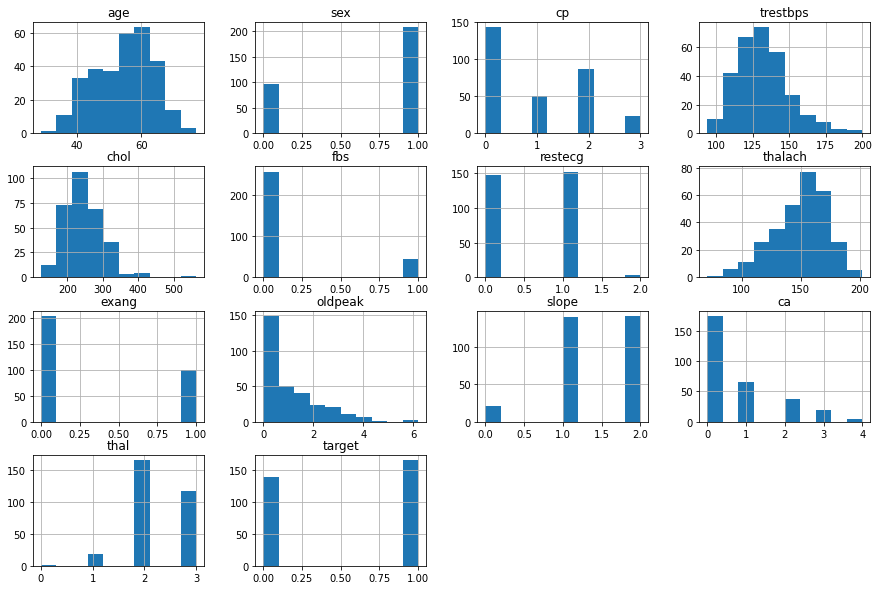

In [ ]:
heart_df.hist(bins=10, figsize=(15,10))
plt.show()

### Plot the correlation matrix

In [ ]:
corr_matrix = heart_df.corr()
relation_index = corr_matrix.index

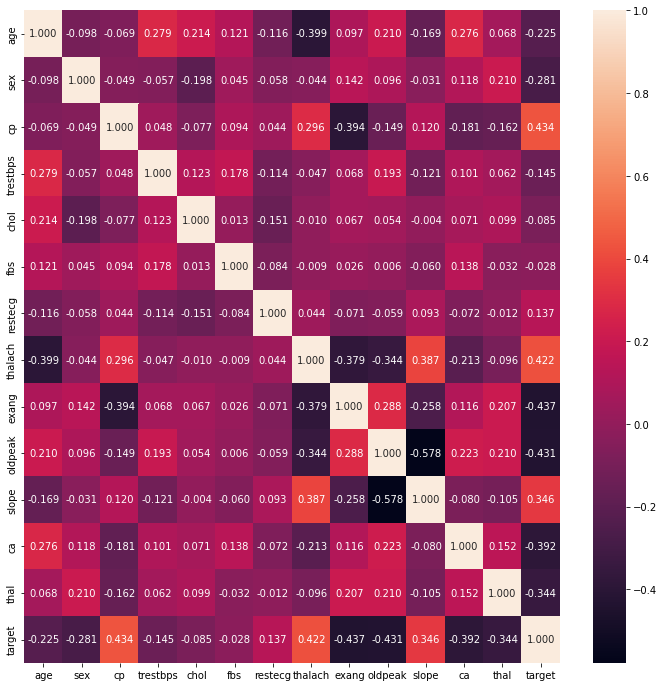

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(heart_df[relation_index].corr(),fmt=".3f",annot=True)
plt.show()

### Feature selection based on correlation with 'Target' and checking for multicollinearity

In [ ]:
#X = heart_df.iloc[:,:-1]
#y = heart_df['target']

y = heart_df["target"]
X = heart_df.drop('target', axis=1)

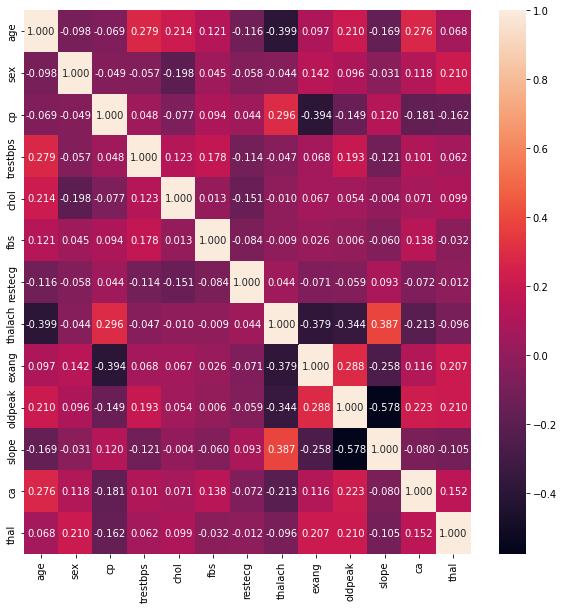

In [ ]:
# Correlation matrix
corr = X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

cp, thalach and slope are features that are highly correlated with the target

In [ ]:
# Check the features with highest correlation
corr_matrix['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

### See the plot of the most correlated features

In [ ]:
attributes = ['target', 'cp', 'thalach', 'slope'] 
fig = px.scatter_matrix(heart_df[attributes], width=800, height=600)
fig.show()

## Data preparation

### Check for multicollinearity using Variance Inflation Factor (VIF)

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

     feature        VIF
0        age  38.998305
1        sex   3.523211
2         cp   2.414403
3   trestbps  58.557335
4       chol  26.267365
5        fbs   1.268205
6    restecg   2.058206
7    thalach  42.742178
8      exang   2.022527
9    oldpeak   3.062890
10     slope  10.072734
11        ca   1.808925
12      thal  17.165303


### Solve the multicollinearity problem by removing the feature with high VIF

In [ ]:
#x = salinity_df_norm.drop(columns=['STheta']).iloc[:,:-1]
#Removing the feature that improves the R2 and RMSE values
X = heart_df.drop(columns=['trestbps']).iloc[:,:-1]

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

    feature        VIF
0       age  28.599796
1       sex   3.522376
2        cp   2.403644
3      chol  25.923434
4       fbs   1.250256
5   restecg   2.058206
6   thalach  34.026519
7     exang   1.990878
8   oldpeak   2.973430
9     slope  10.067190
10       ca   1.808102
11     thal  17.005949


### Data Preparation for training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = STATE)

In [ ]:
print('Training set:',X_train.shape)
print('Testing set:',X_test.shape)

Training set: (242, 12)
Testing set: (61, 12)


In [ ]:
#Check that the data is equally splitted
from collections import Counter
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 107, 1: 135})

#### Normalization

In [ ]:
scaler = MinMaxScaler(feature_range= (0, 1))
normalized_X_train_m01 = scaler.fit_transform(X_train)
normalized_X_test_m01 = scaler.transform(X_test)

# Different Machine learning models

1. Random Forest Classifier
2. Support Vector Machine
3. K-Nearest Neighbour
4. Decision Tree Classifier
5. Logistic Regression
6. Ensemble: Stacking models
7. Multilayer Perceptron Neural Network

In [ ]:
def rmse(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(mean_squared_error(y_test, y_pred))

## 1. Random Forest Classification model

#### 1a. Cross validate with recursive feature elimimation using the different number of features for Random Forest Classification model and check the effects on the R2 score and RMSE.  


In [ ]:
from sklearn.feature_selection import RFECV
RFECV(estimator=RandomForestClassifier()).get_params()

{'cv': None,
 'estimator': RandomForestClassifier(),
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'importance_getter': 'auto',
 'min_features_to_select': 1,
 'n_jobs': None,
 'scoring': None,
 'step': 1,
 'verbose': 0}

In [ ]:
rfecv = RFECV(estimator=RandomForestClassifier(), step=1, cv=5, scoring="r2")
_ = rfecv.fit(normalized_X_train_m01, y_train)
print('Optimal number of features :', rfecv.n_features_)

Optimal number of features : 12


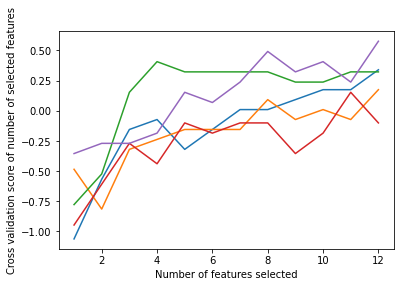

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

In [ ]:
rfc_regressor = RandomForestClassifier()
rfecv_model =rfc_regressor.fit(normalized_X_train_m01, y_train)

y_pred_rf = rfecv_model.predict(normalized_X_test_m01)
test_rf = rfecv_model.score(normalized_X_test_m01, y_test)
print('R2 Score:', test_rf)
error_rf = rmse(y_test, y_pred_rf)
print('RMSE:', error_rf)
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
# measure accuracy
acc_rf = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_rf)
print('Accuracy:',acc_rf)

R2 Score: 0.8688524590163934
RMSE: 0.3621429841700741
MAE: 0.13114754098360656
MSE: 0.13114754098360656
Accuracy: 0.8688524590163934


In [ ]:
cross_val_score(rfecv_model, normalized_X_train_m01, y_train)

array([0.7755102 , 0.75510204, 0.83333333, 0.72916667, 0.89583333])

In [ ]:
# View the class-wise accuracy of the scaling technique which performs better of the two
class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred_rf)
print(class_wise)

              precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.81      0.97      0.88        30

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



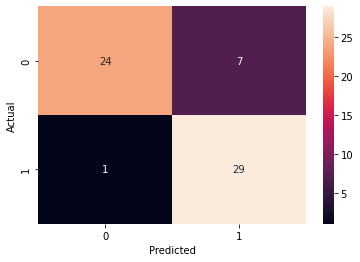

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

i. The performance of **Random Forest Regressor** is good with the R2 score of $84 \%$ and lowest RMSE score of $0.4$

ii. It's best because it introduces extra randomness and the algorithm results in greater tree diversity, which trades a higher bias for a lower variance, and usually yield an overall better model. In addition, this algorithm works best with no tuning of hyperparameter.

## 2. Support Vector Machine model with a polynomial kernel

In [ ]:
# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='poly')

# fit
svm_linear.fit(normalized_X_train_m01, y_train)
y_pred_sv = svm_linear.predict(normalized_X_test_m01)
test_sv = svm_linear.score(normalized_X_test_m01, y_test)
error_sv = rmse(y_test, y_pred_sv)
acc_sv = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_sv)

print('R2 Score:', test_sv)
print('RMSE:', error_sv)
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_sv))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_sv))
# measure accuracy
print('Accuracy:',acc_sv)

R2 Score: 0.8852459016393442
RMSE: 0.3387537429470791
MAE: 0.11475409836065574
MSE: 0.11475409836065574
Accuracy: 0.8852459016393442


In [ ]:
# View the class-wise accuracy of the scaling technique which performs better of the two
class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred_sv)
print(class_wise)

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        31
           1       0.83      0.97      0.89        30

    accuracy                           0.89        61
   macro avg       0.90      0.89      0.88        61
weighted avg       0.90      0.89      0.88        61



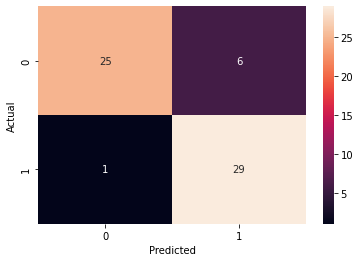

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred_sv, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

## 3. Implemeting K-Nearest Neighbors with the normalized data from MinMaxScalar with feature_range=(0,1)

#### Calculate the test accuracy with respect to different choices of K for K-nearest neighbors and using the normalized data

In [ ]:
# Helper function for calculating accuracy
def accuracy(y_pred, y_test):
    accuracy = (y_pred == y_test).mean()
    return accuracy

In [ ]:
test_accs = []
for k in range(1, normalized_X_train_m01.shape[0]):
    # Create K nearest neighbors classifier
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(normalized_X_train_m01, y_train)
    
    # Prediction
    y_pred = neigh.predict(normalized_X_test_m01)
    
    # Calculate accuracy
    acc = (y_pred == y_test).mean()
    test_accs.append(acc)

Text(0, 0.5, 'Test set accuracy')

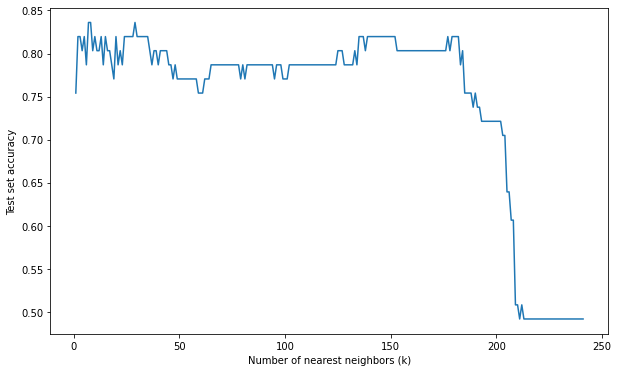

In [ ]:
plt.figure(figsize=(10, 6))
#plt.grid()
plt.plot(list(range(1, normalized_X_train_m01.shape[0])), test_accs)
plt.xlabel('Number of nearest neighbors (k)')
plt.ylabel('Test set accuracy')

In [ ]:
max_test_accs = max(test_accs)  # Find the maximum test set accuracy 
kvalues = list(range(1, normalized_X_train_m01.shape[0])) # all k values from 0 to 120
max_k = kvalues[test_accs.index(max_test_accs)]  # Find the k value corresponding to the maximum test set accuracy
print(max_k, max_test_accs) #print (max k, max test set accuracy)

7 0.8360655737704918


In [ ]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(normalized_X_train_m01, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_knn = knn.predict(normalized_X_test_m01)

test_knn = knn.score(normalized_X_test_m01, y_test)
acc_knn = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_knn)
error_knn = rmse(y_test, y_pred_knn)

print('R2 Score:', test_knn)
print('RMSE:', error_knn)
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_knn))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_knn))
# measure accuracy
print('Accuracy:',acc_knn)

print(classification_report(y_test, y_pred_knn))

R2 Score: 0.8360655737704918
RMSE: 0.40488816508945796
MAE: 0.16393442622950818
MSE: 0.16393442622950818
Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        31
           1       0.83      0.83      0.83        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



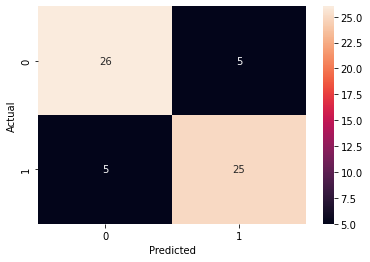

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred_knn, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

1. K= 7 gives the best test set accuracy of 0.87
        
2. Because the rule of thumb says that k must be less than the square root of the number of training examples. Therefore, increase in k requires more training samples.

Text(0, 0.5, 'Test examples id')

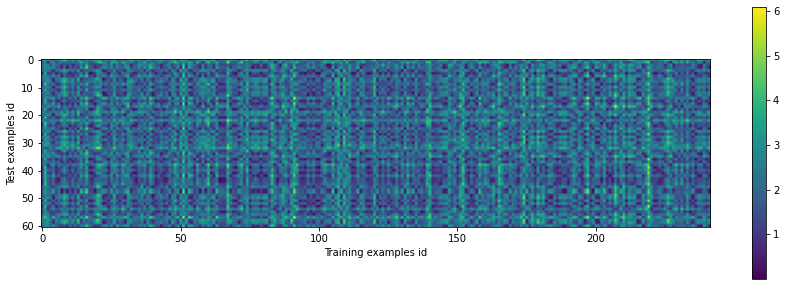

In [ ]:
distances = []
for x_test in normalized_X_test_m01:
    distance = np.sum((x_test[np.newaxis, ...] - normalized_X_train_m01) ** 2, axis=1)
    distances.append(distance)

distances = np.array(distances)
plt.figure(figsize=(15, 5))
plt.imshow(distances)
plt.colorbar()
plt.xlabel('Training examples id')
plt.ylabel('Test examples id')

## 4. Decision Tree Classifier model with the normalized data from MinMaxScalar with feature_range=(0,1)

### Finding good hyper-parameters with Grid SearchCV

In [ ]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
params = {'max_depth': list(range(0, 200, 5)), 'criterion':['entropy','gini'], 'min_samples_split': list(range(0, 200, 5)), 'splitter':['best','random'], 'min_samples_leaf':list(range(0,200,5))}
dtr_rand_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=STATE), params, verbose=1, cv=5)

dtr_rand_search_cv.fit(normalized_X_train_m01, y_train)

Fitting 5 folds for each of 256000 candidates, totalling 1280000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                       55, 60, 65, 70, 75, 80, 85, 90, 95, 100,
                                       105, 110, 115, 120, 125, 130, 135, 140,
                                       145, ...],
                         'min_samples_leaf': [0, 5, 10, 15, 20, 25, 30, 35, 40,
                                              45, 50, 55, 60, 65, 70, 75, 80,
                                              85, 90, 95, 100, 105, 110, 115,
                                              120, 125, 130, 135, 140, 145, ...],
                         'min_samples_split': [0, 5, 10, 15, 20, 25, 30, 35, 40,
                                               45, 50, 55, 60, 65, 70, 75, 80,
                                               85, 90, 95, 100, 105, 110, 115,
                       

In [ ]:
# Best hyper-parameters
dtr_rand_search_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       min_samples_split=25, random_state=101)

In [ ]:
tuned_params_model = DecisionTreeClassifier(max_depth=5, criterion = 'entropy', min_samples_leaf=10, min_samples_split=25, splitter='random', random_state=101)
tuned_params_model.fit(normalized_X_train_m01, y_train)
tuned_params_model.score(normalized_X_train_m01,y_train)

0.8181818181818182

In [ ]:
y_pred_dr = tuned_params_model.predict(normalized_X_test_m01)
test_dr = tuned_params_model.score(normalized_X_test_m01, y_test)
acc_dr = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_dr)
error_dr = rmse(y_test, y_pred_dr)

print('R2 Score:', test_dr)
print('RMSE:', error_dr)
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_dr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_dr))
# measure accuracy
print('Accuracy:',acc_dr)

print(classification_report(y_test, y_pred_dr))

R2 Score: 0.7540983606557377
RMSE: 0.4958847036804647
MAE: 0.2459016393442623
MSE: 0.2459016393442623
Accuracy: 0.7540983606557377
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        31
           1       0.70      0.87      0.78        30

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



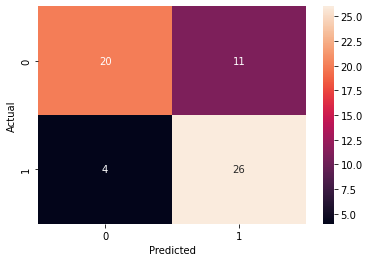

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred_dr, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

## 5. Logistic Regression with the normalized data from MinMaxScalar with feature_range=(0,1)

In [ ]:
logistic_regression= LogisticRegression(penalty='l2')
logistic_regression.fit(normalized_X_train_m01,y_train)
y_pred_lor=logistic_regression.predict(normalized_X_test_m01)
test_lor = rfecv_model.score(normalized_X_test_m01, y_test)
acc_lor = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_lor)
error_lor = rmse(y_test, y_pred_lor)

print('R2 Score:', test_lor)
print('RMSE:', error_lor)
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_lor))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lor))
print('Accuracy:',acc_lor)

R2 Score: 0.8688524590163934
RMSE: 0.40488816508945796
MAE: 0.16393442622950818
MSE: 0.16393442622950818
Accuracy: 0.8360655737704918


In [ ]:
# View the class-wise accuracy of the scaling technique which performs better of the two
class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred_lor)
print(class_wise)

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



Accuracy:  0.8360655737704918


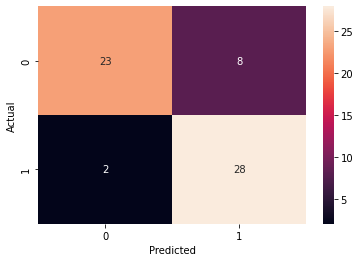

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred_lor, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_lor))
plt.show()

## 6. Ensemble: Stacking Models

In [ ]:
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('random_forest_regressor', RandomForestClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('xgradboost', XGBClassifier()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [ ]:
stacked_model = get_stacking()
stacked_model = stacked_model.fit(normalized_X_train_m01, y_train)
y_pred_stack = stacked_model.predict(normalized_X_test_m01)
test_stack = stacked_model.score(normalized_X_test_m01, y_test)
acc_stack = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_stack)
error_stack = rmse(y_test, y_pred_stack)

print('R2 Score:', test_stack)
print('RMSE:', error_stack)
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_stack))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_stack))
print('Accuracy:',acc_stack)


R2 Score: 0.8524590163934426
RMSE: 0.3841106397986879
MAE: 0.14754098360655737
MSE: 0.14754098360655737
Accuracy: 0.8524590163934426


In [ ]:
# View the class-wise accuracy of the scaling technique which performs better of the two
class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred_stack)
print(class_wise)

              precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.78      0.97      0.87        30

    accuracy                           0.85        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.87      0.85      0.85        61



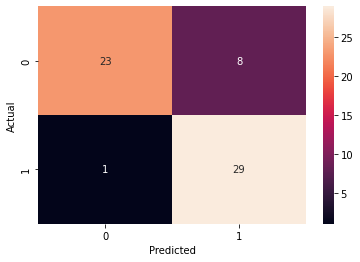

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred_stack, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

## 7. Multi-layer Perceptron Classifier (MLPC) for Neutral Network using the normalized data, implemented with Scikit-Learn. This model could be implemented with Keras as well

In [ ]:
import keras
#from keras.models import Sequential,Input,Model
#from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.advanced_activations import LeakyReLU
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier # Our artificial neural network library.

In [ ]:
MLPC = MLPClassifier().fit(normalized_X_train_m01,y_train) # We use normalized_X_test_m01.
y_pred_nn = MLPC.predict(normalized_X_test_m01) # We test with normalised x test.
print(y_pred_nn[:20]) # Estimated y values

[0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0]


In [ ]:
NewData = pd.DataFrame({'Real_y_values':y_test,
                       'Predicted_y_values':y_pred_nn})
NewData.head()
# Actual and predicted y values.

,Real_y_values,Predicted_y_values
221,0,0
8,1,1
89,1,1
154,1,1
201,0,0


In [ ]:
test_nn = MLPC.score(normalized_X_test_m01, y_test)
acc_nn = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_nn)
error_nn = rmse(y_test, y_pred_nn)

print('R2 Score:', test_nn)
print('RMSE:', error_nn)
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_nn))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_nn))
print('Accuracy:',acc_nn)


R2 Score: 0.8688524590163934
RMSE: 0.3621429841700741
MAE: 0.13114754098360656
MSE: 0.13114754098360656
Accuracy: 0.8688524590163934


In [ ]:
# View the class-wise accuracy of the scaling technique which performs better of the two
class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred_nn)
print(class_wise)

              precision    recall  f1-score   support

           0       0.93      0.81      0.86        31
           1       0.82      0.93      0.87        30

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



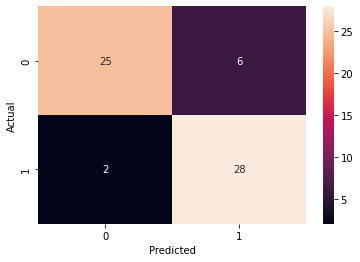

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred_nn, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

## Model Evaluation

In [ ]:
model_evaluation = pd.DataFrame({'Model': ['Random Forest','Support Vector Machine','K-Nearest Neighbour','Decision Tree','Logistic Regression','Stacking Models', 'Multi-Layer Perceptron'], 'Accuracy': [acc_rf*100,
                    acc_sv*100,acc_knn*100,acc_dr*100,acc_lor*100,acc_stack*100,acc_nn*100], 'R2 Score': [test_rf*100,
                    test_sv*100,test_knn*100,test_dr*100,test_lor*100,test_stack*100,test_nn*100], 'RMSE': [error_rf,
                    error_sv,error_knn,error_dr,error_lor,error_stack,error_nn]})
model_evaluation

,Model,Accuracy,R2 Score,RMSE
0,Random Forest,86.885246,86.885246,0.362143
1,Support Vector Machine,88.524590,88.524590,0.338754
2,K-Nearest Neighbour,83.606557,83.606557,0.404888
3,Decision Tree,75.409836,75.409836,0.495885
4,Logistic Regression,83.606557,86.885246,0.404888
5,Stacking Models,85.245902,85.245902,0.384111
6,Multi-Layer Perceptron,86.885246,86.885246,0.362143


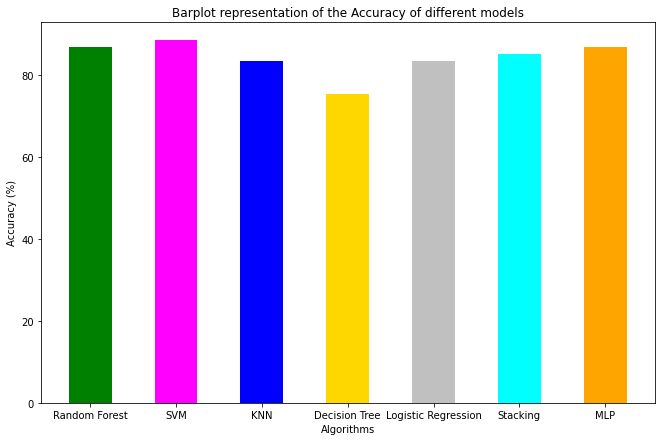

In [ ]:
colors = ['green','magenta','blue','gold','silver','cyan','orange',]
bars = ('Random Forest', 'SVM', 'KNN', 'Decision Tree', 'Logistic Regression', 'Stacking', 'MLP')
plt.figure(figsize=(11,7))
plt.title("Barplot representation of the Accuracy of different models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy (%)")
plt.bar(model_evaluation['Model'],model_evaluation['Accuracy'],color = colors, width = 0.5)
plt.xticks(model_evaluation['Model'], bars)
plt.show()

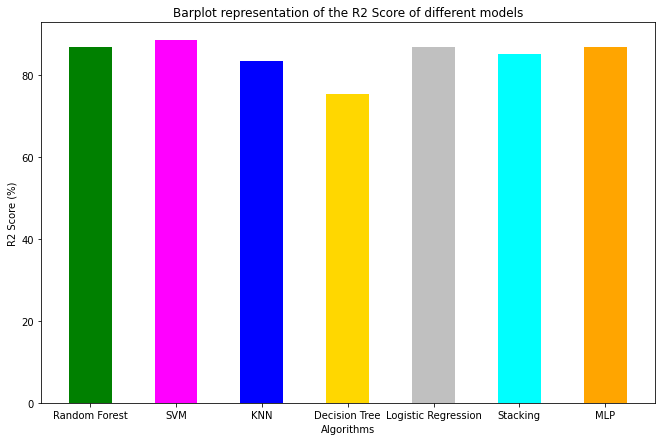

In [ ]:
colors = ['green','magenta','blue','gold','silver','cyan','orange',]
plt.figure(figsize=(11,7))
plt.title("Barplot representation of the R2 Score of different models")
plt.xlabel("Algorithms")
plt.ylabel("R2 Score (%)")
plt.bar(model_evaluation['Model'],model_evaluation['R2 Score'],color = colors, width = 0.5)
plt.xticks(model_evaluation['Model'], bars)
plt.show()

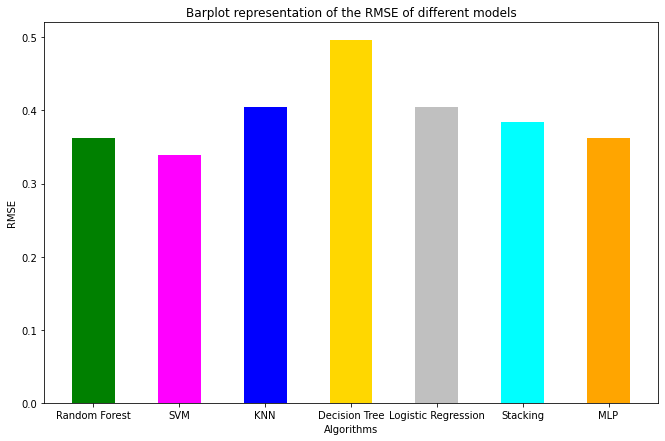

In [ ]:
colors = ['green','magenta','blue','gold','silver','cyan','orange',]
plt.figure(figsize=(11,7))
plt.title("Barplot representation of the RMSE of different models")
plt.xlabel("Algorithms")
plt.ylabel("RMSE")
plt.bar(model_evaluation['Model'],model_evaluation['RMSE'],color = colors, width = 0.5)
plt.xticks(model_evaluation['Model'], bars)
plt.show()

In [189]:
fig = px.bar(model_evaluation, x = 'Model', y = 'Accuracy', text_auto=True, color='Model', width=900, height=700)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
fig.update_layout(title_text='Barplot representation of the Accuracy of different models', xaxis_tickangle=-45, xaxis=dict(title='Model', titlefont_size=16, tickfont_size=14), yaxis=dict(title='Accuracy (%)', titlefont_size=16, tickfont_size=14))
fig.show()

In [190]:
fig = px.bar(model_evaluation, x = 'Model', y = 'R2 Score', text_auto=True, color='Model', width=900, height=700)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
fig.update_layout(title_text='Barplot representation of the R2 Score of different models', xaxis_tickangle=-45, xaxis=dict(title='Model', titlefont_size=16, tickfont_size=14), yaxis=dict(title='R2 Score (%)', titlefont_size=16, tickfont_size=14))
fig.show()

In [191]:
fig = px.bar(model_evaluation, x = 'Model', y = 'RMSE', text_auto=True, color='Model', width=900, height=700)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
fig.update_layout(title_text='Barplot representation of the RMSE of different models', xaxis_tickangle=-45, xaxis=dict(title='Model', titlefont_size=16, tickfont_size=14), yaxis=dict(title='RMSE', titlefont_size=16, tickfont_size=14))
fig.show()

## Conclusion

1. Support Vector Machine (SVM) gave the best accuracy compared to other models.
2. Ensembling increased the overall accuracy but still lower than SVM.